In [1]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

from tsp import *

## Análise

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [71]:
df = pd.read_csv("data.csv")
df

,tsp_func,num_verts,length,time,memory,dist_type
0,Twice around the tree,16,420,0.000024,151.480469,Euclides
1,Twice around the tree,16,596,0.000016,151.488281,Manhattan
2,Christofides,16,402,0.000181,151.625000,Euclides
3,Christofides,16,490,0.000069,151.644531,Manhattan
4,Twice around the tree,32,666,0.000031,151.914062,Euclides
5,Twice around the tree,32,862,0.000031,151.937500,Manhattan
6,Christofides,32,551,0.000297,152.031250,Euclides
7,Christofides,32,708,0.000245,152.046875,Manhattan
8,Twice around the tree,64,790,0.000109,153.167969,Euclides
9,Twice around the tree,64,1080,0.000117,153.398438,Manhattan


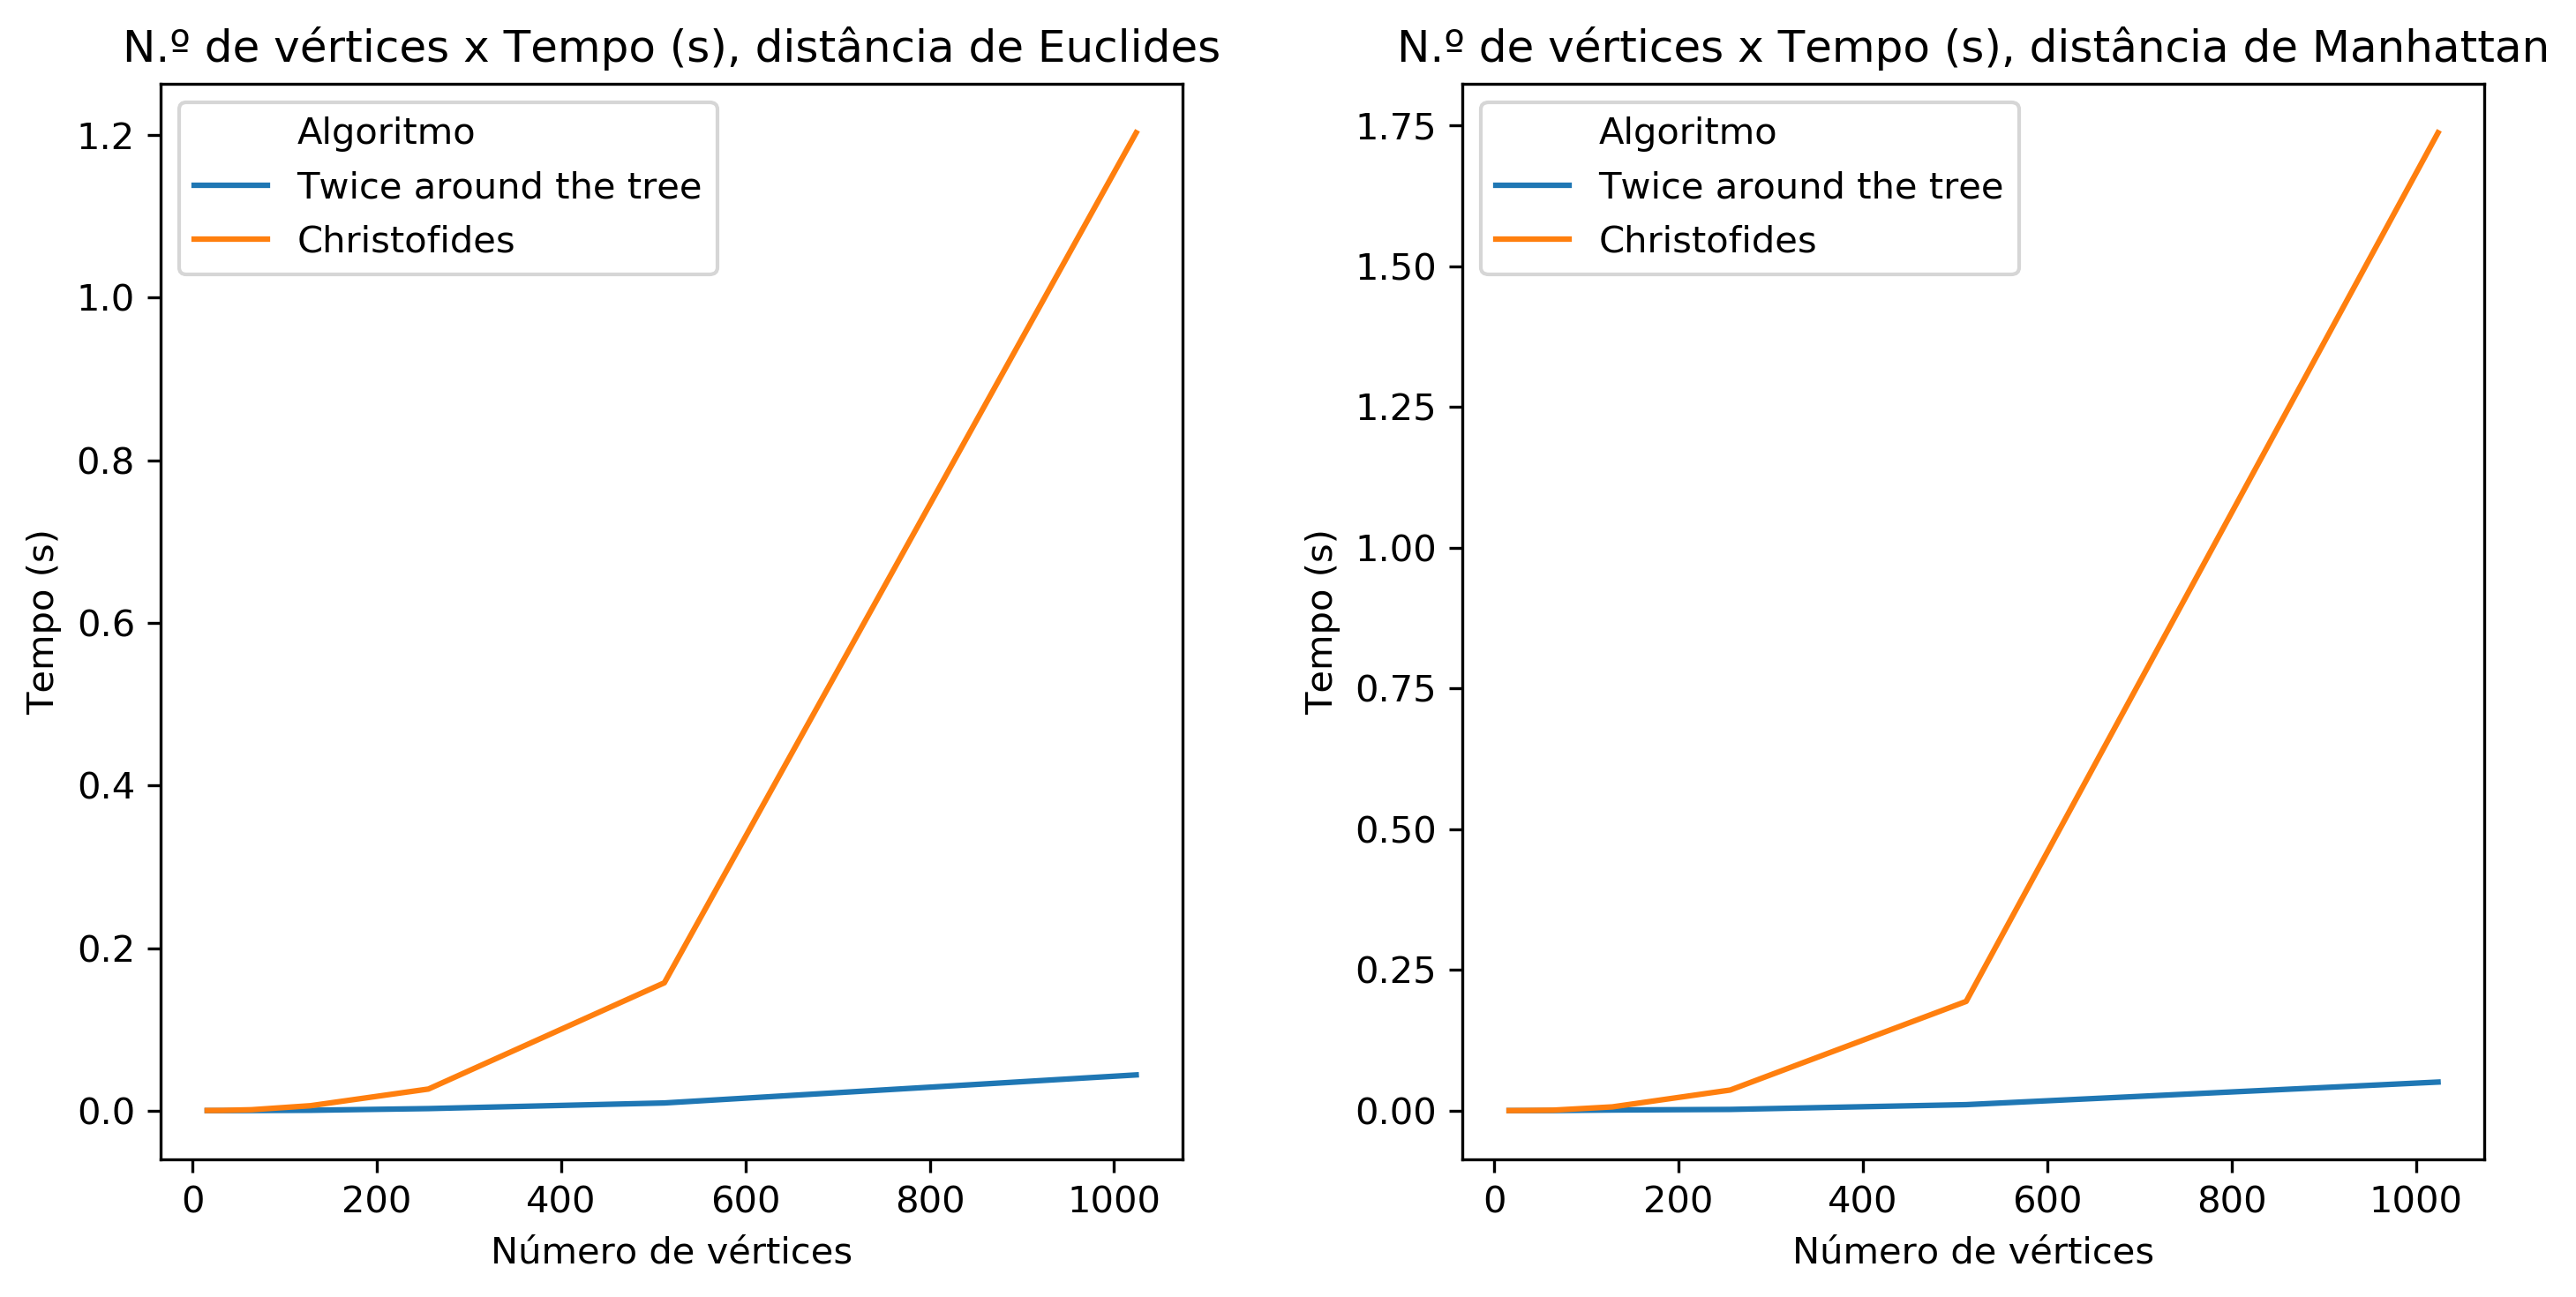

In [72]:
# O algoritmo de Christofides, por ser cúbico, gasta um tempo substancialmente maior do que o Twice Around the Tree,
# que é da ordem de O(n log n). Observando a escala y, é possível perceber que a distância de Manhattan é um pouco
# mais lenta, talvez aumentando o número de vértices essa diferença fique mais aparente.

euclid = df[df["dist_type"] == "Euclides"]
euclid = euclid.rename(columns={"tsp_func": "Algoritmo", "num_verts": "Número de vértices", "time" : "Tempo (s)"})
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title("N.º de vértices x Tempo (s), distância de Euclides")
sns.lineplot(x="Número de vértices", y="Tempo (s)", hue="Algoritmo", data=euclid)

plt.subplot(1, 2, 2)
manh = df[df["dist_type"] == "Manhattan"]
manh = manh.rename(columns={"tsp_func": "Algoritmo", "num_verts": "Número de vértices", "time" : "Tempo (s)"})
plt.title("N.º de vértices x Tempo (s), distância de Manhattan")
sns.lineplot(x="Número de vértices", y="Tempo (s)", hue="Algoritmo", data=manh)

plt.tight_layout()
plt.show()

In [73]:
#### AUMENTAR O NUMERO DE VERTICES PARA O UPPERBOUND

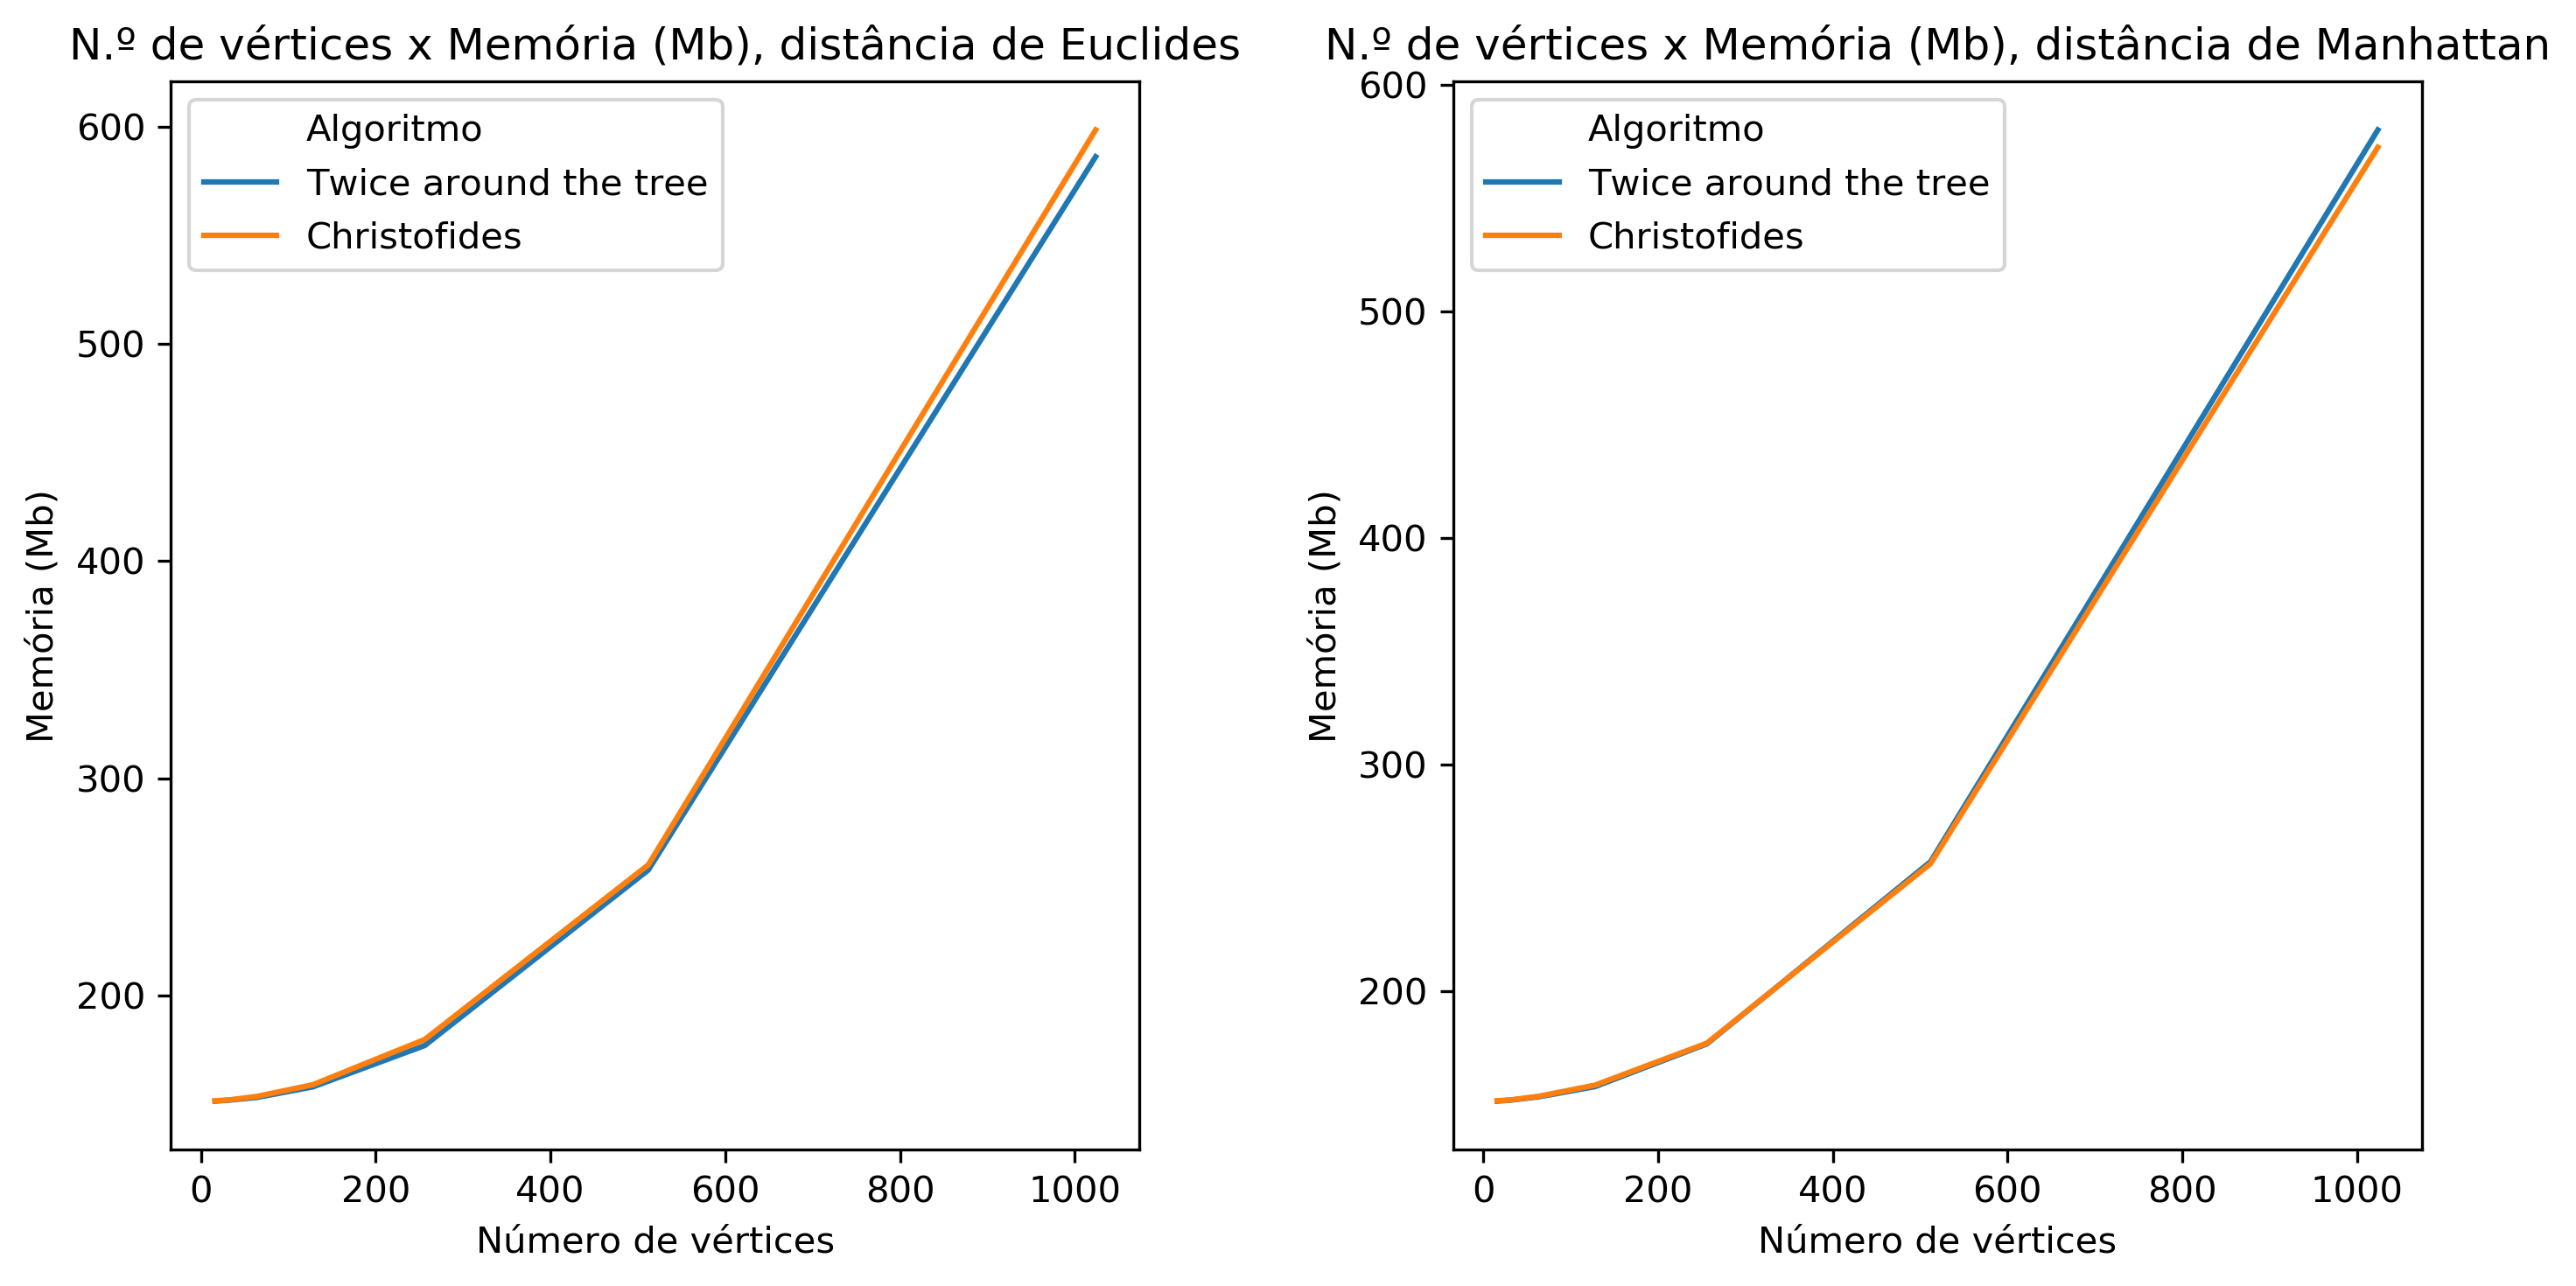

In [76]:
# Os dois algoritmos e as duas distâncias crescem na mesma "velocidade" se tratando de memória.

euclid_m = df[df["dist_type"] == "Euclides"]
euclid_m = euclid.rename(columns={"tsp_func": "Algoritmo", "num_verts": "Número de vértices", "memory" : "Memória (Mb)"})
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title("N.º de vértices x Memória (Mb), distância de Euclides")
sns.lineplot(x="Número de vértices", y="Memória (Mb)", hue="Algoritmo", data=euclid_m)

plt.subplot(1, 2, 2)
manh_m = df[df["dist_type"] == "Manhattan"]
manh_m = manh.rename(columns={"tsp_func": "Algoritmo", "num_verts": "Número de vértices", "memory" : "Memória (Mb)"})
plt.title("N.º de vértices x Memória (Mb), distância de Manhattan")
sns.lineplot(x="Número de vértices", y="Memória (Mb)", hue="Algoritmo", data=manh_m)

plt.tight_layout()
plt.show()

In [77]:
df_bb = pd.read_csv("data_full.csv")

In [78]:
df_bb

,tsp_func,num_verts,solution,time,memory,dist_type
0,Twice around the tree,5,217,0.000015,151.890625,Euclides
1,Twice around the tree,5,294,0.000005,151.894531,Manhattan
2,Christofides,5,195,0.000030,152.015625,Euclides
3,Christofides,5,260,0.000070,152.023438,Manhattan
4,Branch and Bound,5,195,0.000010,152.027344,Euclides
5,Branch and Bound,5,260,0.000007,152.027344,Manhattan
6,Twice around the tree,6,279,0.000004,152.027344,Euclides
7,Twice around the tree,6,336,0.000003,152.027344,Manhattan
8,Christofides,6,279,0.000011,152.042969,Euclides
9,Christofides,6,336,0.000009,152.050781,Manhattan


In [79]:
df_bb = df_bb.drop(df_bb.index[[54, 55, 56, 57]])

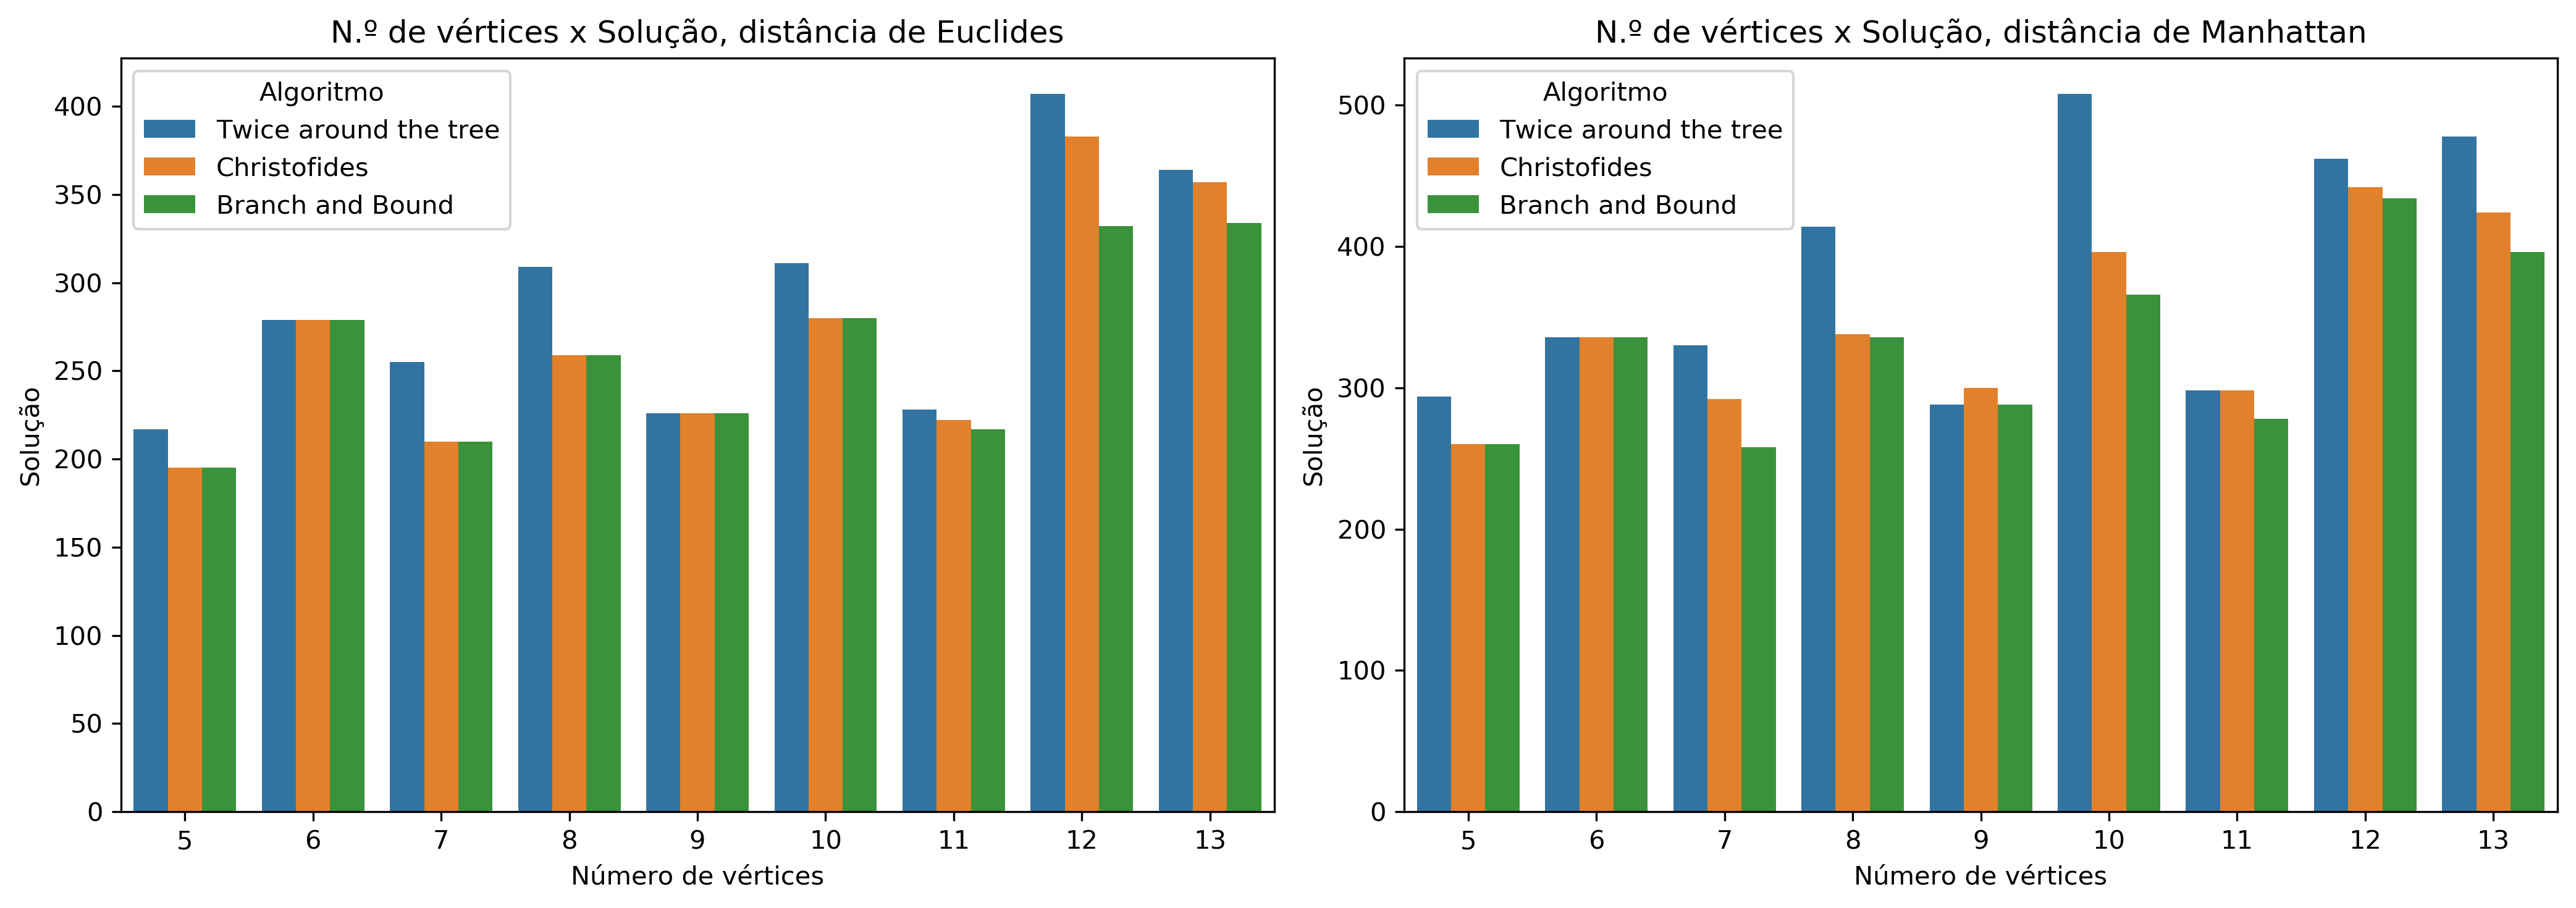

In [80]:
bb_euclid = df_bb[df_bb["dist_type"] == "Euclides"]
bb_euclid = bb_euclid.rename(columns={"tsp_func": "Algoritmo", "num_verts": "Número de vértices", "solution" : "Solução"})
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.title("N.º de vértices x Solução, distância de Euclides")
sns.barplot(x="Número de vértices", y="Solução", hue="Algoritmo", data=bb_euclid)

plt.subplot(1, 2, 2)
bb_manh = df_bb[df_bb["dist_type"] == "Manhattan"]
bb_manh = bb_manh.rename(columns={"tsp_func": "Algoritmo", "num_verts": "Número de vértices", "solution" : "Solução"})
bb_manh
plt.title("N.º de vértices x Solução, distância de Manhattan")
sns.barplot(x="Número de vértices", y="Solução", hue="Algoritmo", data=bb_manh)

plt.tight_layout()
plt.show()

In [81]:
# Como se pode concluir das análises, existe um trade-off na escolha dos três algoritmos. O Branch-and-bound retorna
# solução exata, porém se torna inviável com um pequeno número de vértices. Já o Christofides apresenta um coeficiente
# de aproximação razoável (alpha = 1.5), porém possui um alto custo assintótico, se tornando, também, inviável para
# problemas muito grandes. Por fim, o Twice-around-the-tree é o mais rápido dentre os algoritmos vistos mas apresenta
# a maior diferença da solução ótima.